In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster
import pandas as pd
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster,is_valid_linkage
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from pandas.plotting import scatter_matrix

# Dataset Fromage
We'll be using different unsupervised learning algorithms on this dataset. It contains the composition of 29 types of cheese and we want to divide them into clusters.

In [2]:
fromage=pd.read_table(r"fromage.txt",sep="\t",header=0,index_col=0)
print(fromage.describe())

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

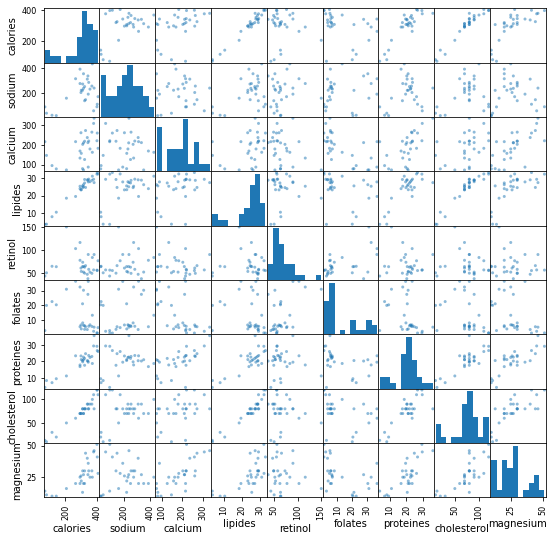

In [3]:
scatter_matrix(fromage, figsize=(9,9))
plt.show()

# 1-K-means method (4 clusters)

In [4]:
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(fromage)
idk = np.argsort(kmeans.labels_)

In [5]:
print("The attributes of the centers:")
print(kmeans.cluster_centers_)

The attributes of the centers:
[[297.85714286 239.78571429 103.84285714  24.91428571  83.92857143
   23.05714286  18.97142857  71.42857143  21.71428571]
 [363.875      146.125      257.025       29.05        63.6
    3.8625      26.5625      96.25        38.875     ]
 [101.75        44.75       133.75         6.275       55.15
   16.475        7.2         18.25        11.25      ]
 [329.8        306.6        206.82        26.87        64.24
   11.91        21.08        82.          27.4       ]]


In [6]:
print(pd.DataFrame(fromage.index[idk], kmeans.labels_[idk]))
print(kmeans.transform(fromage))

             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45
[[123.59715669 285.36163076 384.27301005 145.46927992]
 [110.54651897 118.43379084 303.10311983  71.72681089]
 [235.25665316  56.72603293 349.91323389 218.1879268 ]
 [159.09984736 200.30401971 393.76898843  45.60922494]
 [141.19170858 210.31138298 332.43471728  84.66051854]
 [180.75982487 111.73150994 371.97076666  86.99931839]
 [ 72.0404

### Silhouette metric for different numbers of clusters

List of silouhette metric:
[0.50681355 0.37299771 0.3282387  0.35737616 0.32267618 0.28114392
 0.29450378 0.23904343 0.25006247]


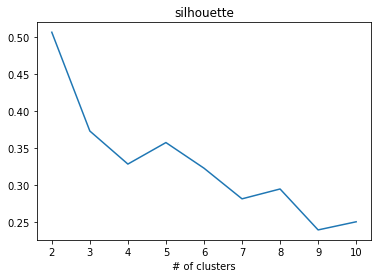

In [7]:
res = np.arange(9, dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k + 2)
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage, km.labels_)
print("List of silouhette metric:")
print(res)
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2, 11, 1), (res))
plt.show()

We conclude that the best number of clusters is 2 (0.5 silouhette value)

# 2-CAH Method

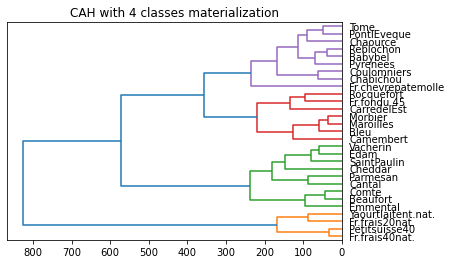

cheese with their classes
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [8]:
Z = linkage(fromage, method='ward', metric='euclidean')
plt.title("CAH")
plt.title('CAH with 4 classes materialization')
dendrogram(Z, labels=fromage.index, orientation='left', color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t=255, criterion='distance')
idg = np.argsort(groupes_cah)
print("cheese with their classes")
print(pd.DataFrame(fromage.index[idg], groupes_cah[idg]))

### Comparision with Kmeans by crossing results

In [23]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(fromage)
print(pd.crosstab(groupes_cah-1, kmeans.labels_))

col_0  0  1  2  3
row_0            
0      0  0  4  0
1      1  0  0  8
2      7  0  0  0
3      2  7  0  0


# 3-PCA Method

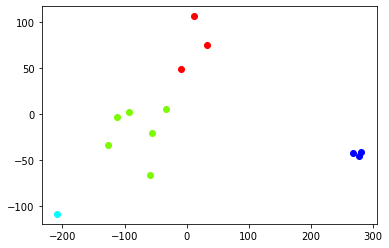

In [10]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(fromage)
acp = PCA(n_components=4).fit_transform(fromage)
for couleur, k in zip(['red', 'blue', 'lawngreen', 'aqua'], [0, 1, 2, 3]):
    plt.scatter(acp[km.labels_ == k, 0], acp[km.labels_ == k, 1], c=couleur)
plt.show()

# Agglomerative Clustering Method

In [11]:
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(fromage)
ac = AgglomerativeClustering(n_clusters=4)
ac.fit(fromage)
idk = np.argsort(ac.labels_)
print(pd.DataFrame(fromage.index[idk], ac.labels_[idk]))

             Fromages
0         SaintPaulin
0            Beaufort
0            Parmesan
0              Cantal
0             Cheddar
0               Comte
0            Vacherin
0                Edam
0            Emmental
1         CarredelEst
1          Rocquefort
1             Morbier
1           Maroilles
1         Fr.fondu.45
1           Camembert
1                Bleu
2         Coulomniers
2            Chaource
2           Chabichou
2         PontlEveque
2            Pyrenees
2           Reblochon
2             Babybel
2                Tome
2  Fr.chevrepatemolle
3      Fr.frais20nat.
3      Fr.frais40nat.
3       Petitsuisse40
3  Yaourtlaitent.nat.


In [12]:
print(pd.crosstab(ac.labels_, kmeans.labels_))

col_0  0  1  2  3
row_0            
0      0  8  0  1
1      1  0  0  6
2      6  0  0  3
3      0  0  4  0


In [21]:
print(pd.crosstab(ac.labels_, groupes_cah-1))

col_0  0  1  2  3
row_0            
0      0  9  0  0
1      0  0  7  0
2      0  0  0  9
3      4  0  0  0


In [13]:
print("silouhette kmeans:"+str(metrics.silhouette_score(fromage, kmeans.labels_)))
print("silouhette agglomerativeClustering:"+str(metrics.silhouette_score(fromage, ac.labels_)))

silouhette kmeans:0.33699070417188665
silouhette agglomerativeClustering:0.31556786198229136


# Divisive Clustering Method

In [14]:
def value(index):
    if(index>=len(fromage)):
        return Z1[index-len(fromage)][2]
    else:
        return sum(fromage.iloc[index])
        
def original(index):
    if(index>=len(fromage)):
        return Z1[index-len(fromage)][3]
    else:
        return 1

def divisive_recursion(data):
    if(len(data)<2):
        ind=np.argwhere(fromage.index==data.index[0])
        return ind[0][0]
    np.random.seed(0)
    kmeans = cluster.KMeans(n_clusters=2)
    kmeans.fit(data)
    data1=data[kmeans.labels_==0]
    data2=data[kmeans.labels_==1]
    index1=divisive_recursion(data1)
    index2=divisive_recursion(data2)
    Z1.append([
        index1,
        index2,
        value(index1)+value(index2),
        original(index1)+original(index2)
    ])
    return len(Z1)-1+len(fromage)

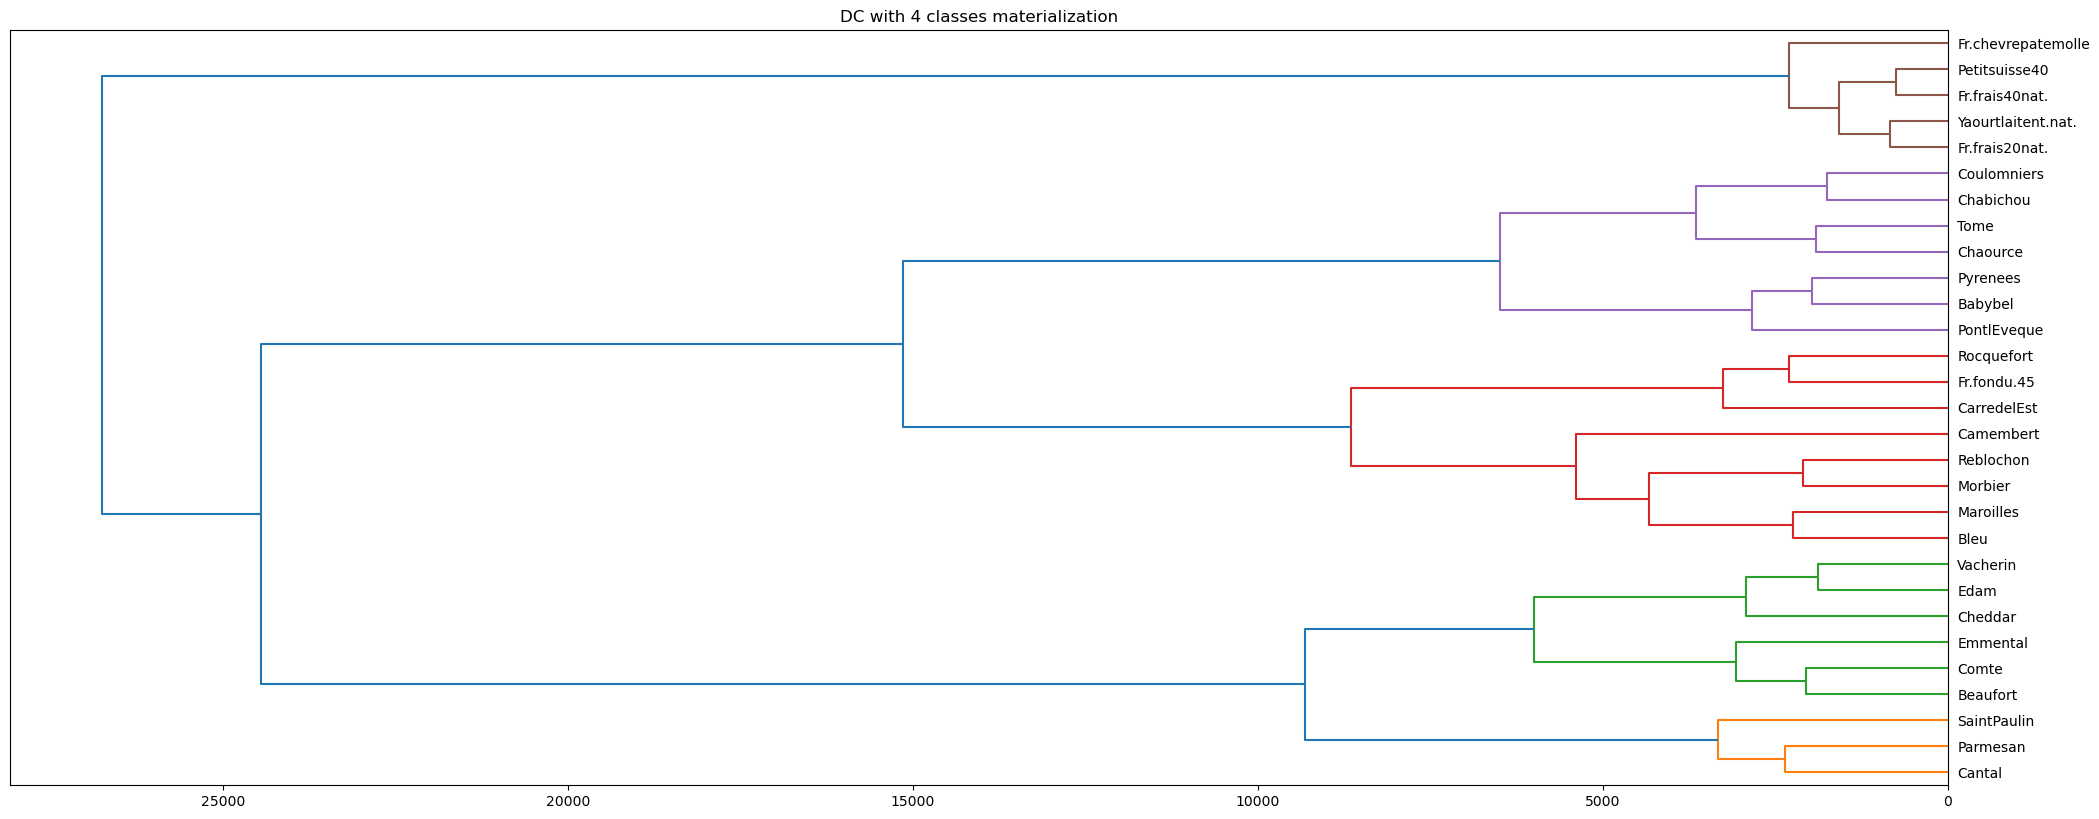

In [24]:
Z1=[]
index=divisive_recursion(fromage)
fig=plt.figure(figsize=(25,10),dpi=100)
plt.title('DC with 4 classes materialization')
dn=dendrogram(Z1, labels=fromage.index,orientation='left', color_threshold=9000)
plt.show()